In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/killed-or-seriously-injured-ksi-toronto-clean/KSI_CLEAN.csv


In [2]:
# Import numpy, pandas, matpltlib.pyplot, sklearn modules and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [3]:
df = pd.read_csv('../input/killed-or-seriously-injured-ksi-toronto-clean/KSI_CLEAN.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 56 columns):
ACCNUM           12557 non-null int64
YEAR             12557 non-null int64
MONTH            12557 non-null int64
DAY              12557 non-null int64
HOUR             12557 non-null int64
MINUTES          12557 non-null int64
WEEKDAY          12557 non-null int64
LATITUDE         12557 non-null float64
LONGITUDE        12557 non-null float64
Ward_Name        12557 non-null object
Ward_ID          12557 non-null int64
Hood_Name        12557 non-null object
Hood_ID          12557 non-null int64
Division         12557 non-null object
District         12557 non-null object
STREET1          12557 non-null object
STREET2          12557 non-null object
OFFSET           12557 non-null object
ROAD_CLASS       12557 non-null object
LOCCOORD         12557 non-null object
ACCLOC           12557 non-null object
TRAFFCTL         12557 non-null object
VISIBILITY       12557 non-null object
L

In [4]:
print(df.columns)

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID',
       'Division', 'District', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'FATAL'],
      dtype='object')


In [5]:
feature_lst=['WEEKDAY','Ward_Name',  'Hood_Name', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'FATAL']

In [6]:
df_sel=df[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 37 columns):
WEEKDAY          12557 non-null int64
Ward_Name        12557 non-null object
Hood_Name        12557 non-null object
ACCLOC           12557 non-null object
TRAFFCTL         12557 non-null object
VISIBILITY       12557 non-null object
LIGHT            12557 non-null object
RDSFCOND         12557 non-null object
IMPACTYPE        12557 non-null object
INVTYPE          12557 non-null object
INVAGE           12557 non-null object
INJURY           12557 non-null object
INITDIR          12557 non-null object
VEHTYPE          12557 non-null object
MANOEUVER        12557 non-null object
DRIVACT          12557 non-null object
DRIVCOND         12557 non-null object
PEDTYPE          12557 non-null object
PEDACT           12557 non-null object
PEDCOND          12557 non-null object
CYCLISTYPE       12557 non-null object
CYCACT           12557 non-null object
CYCCOND          12557 non-null ob

In [7]:
df_sel.isnull().mean()

WEEKDAY          0.0
Ward_Name        0.0
Hood_Name        0.0
ACCLOC           0.0
TRAFFCTL         0.0
VISIBILITY       0.0
LIGHT            0.0
RDSFCOND         0.0
IMPACTYPE        0.0
INVTYPE          0.0
INVAGE           0.0
INJURY           0.0
INITDIR          0.0
VEHTYPE          0.0
MANOEUVER        0.0
DRIVACT          0.0
DRIVCOND         0.0
PEDTYPE          0.0
PEDACT           0.0
PEDCOND          0.0
CYCLISTYPE       0.0
CYCACT           0.0
CYCCOND          0.0
PEDESTRIAN       0.0
CYCLIST          0.0
AUTOMOBILE       0.0
MOTORCYCLE       0.0
TRUCK            0.0
TRSN_CITY_VEH    0.0
EMERG_VEH        0.0
PASSENGER        0.0
SPEEDING         0.0
AG_DRIV          0.0
REDLIGHT         0.0
ALCOHOL          0.0
DISABILITY       0.0
FATAL            0.0
dtype: float64

In [8]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(12557, 37)

In [9]:
target='FATAL'
# Create arrays for the features and the response variable
print(df_sel.shape)
# set X and y
y = df_sel[target]
X1 = df_sel.drop(target, axis=1)
X = pd.get_dummies(X1, drop_first=True)
print(X.shape)



(12557, 37)
(12557, 449)


In [10]:
# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [11]:
# List of classification algorithms
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

In [12]:
# Logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Logistic regression algorithm] accuracy_score: 0.912.


In [13]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.898.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.898.


In [14]:
# Decision tree algorithm

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)


# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)


# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))



# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)


# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
acc=accuracy_gini
accuracy_lst.append(acc)

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.915.
[Decision Tree -- gini] accuracy_score: 0.916.


In [15]:
# Random Forest algorithm

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))


[Randon forest algorithm] accuracy_score: 0.932.


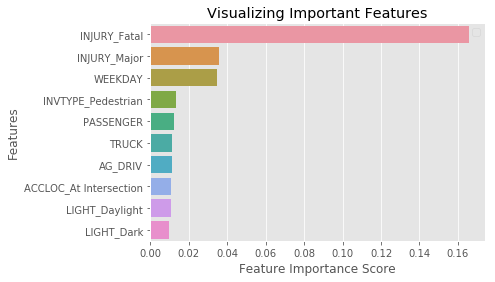

In [16]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [17]:
# List top k important features
k=20
feature_imp.sort_values(ascending=False)[:k]

INJURY_Fatal               0.165768
INJURY_Major               0.035532
WEEKDAY                    0.034792
INVTYPE_Pedestrian         0.013435
PASSENGER                  0.012521
TRUCK                      0.011400
AG_DRIV                    0.011316
ACCLOC_At Intersection     0.010983
LIGHT_Daylight             0.010764
LIGHT_Dark                 0.009768
INJURY_None                0.009583
SPEEDING                   0.009535
TRAFFCTL_Traffic Signal    0.009151
TRAFFCTL_No Control        0.008814
VEHTYPE_Other              0.008266
PEDESTRIAN                 0.008119
RDSFCOND_Dry               0.007853
MANOEUVER_Going Ahead      0.007321
RDSFCOND_Wet               0.007075
AUTOMOBILE                 0.007021
dtype: float64

In [18]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(clf, threshold=0.03)

# Train the selector
sfm.fit(X_train, y_train)

feat_labels=X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

WEEKDAY
INJURY_Fatal
INJURY_Major


In [19]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [20]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature Model
print('[Randon forest algorithm -- Full feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))

[Randon forest algorithm -- Full feature] accuracy_score: 0.932.
[Randon forest algorithm -- Limited feature] accuracy_score: 0.914.


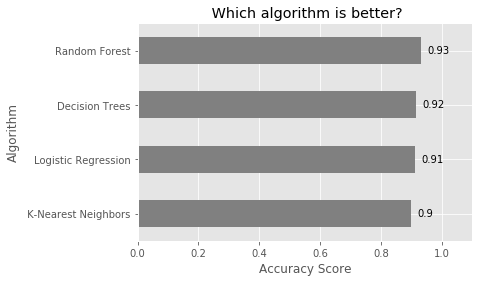

In [21]:
# Make a plot of the accuracy scores for different algorithms

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Export to a file
df_acc.to_csv('./Accuracy_scores_algorithms_{}.csv'.format('abc'),index=False)

# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title(' Which algorithm is better?')

plt.show()